In [1]:
import networkx as nx
import numpy as np
import scipy
from scipy.io import mmread
import matplotlib.pyplot as plt

import os

http://networksciencebook.com/chapter/2#networks-graphs

# 1. Graphs

**Graph**  
    $G = (N,E)$  
    $N$ = graph components: nodes, vertices $\to n_i$  
    $E$ = graph interactions: links, edges $\to e_{i,j}$  
    
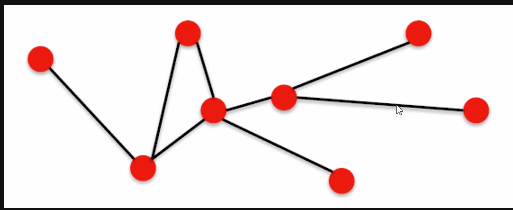

In [2]:
G_pgrid = nx.from_scipy_sparse_matrix(mmread(os.path.join('..', 'data', 'power-US-Grid.mtx')))
G_arvix = nx.read_edgelist(os.path.join('..', 'data', 'collaboration_network_of_arxiv_general_relativity_category.txt'))
G_fb = nx.read_edgelist(os.path.join('..', 'data', 'facebook_combined.txt'))
G_wiki = nx.read_edgelist(os.path.join('..', 'data', 'wiki_vote.txt'))

G_cora = nx.readwrite.graphml.read_graphml(os.path.join('..', 'data', 'cora.graphml'))

# 2. Degrees

### Statistics review
- https://web.mit.edu/~csvoss/Public/usabo/stats_handout.pdf
- https://www.stat.auckland.ac.nz/~fewster/325/notes/ch3.pdf

**Degree -- Definition**  
Number of links connected to the node $k_i$

**Average node degree -- Def**  
Sum the degrees and divide by the number of nodes


$$\langle k \rangle \equiv \dfrac 1 N \sum^N_{i=1}k_i$$

In undirected graphs 
- $\langle k \rangle \equiv \dfrac {2E} N$

Directed graphs
- $\langle k^{in} \rangle \equiv \dfrac 1 N \sum^N_{i=1}k_i^{in} = \dfrac E N$
- $\langle k^{out} \rangle \equiv \dfrac 1 N \sum^N_{i=1}k_i^{out}$

$\langle k \rangle \equiv \dfrac {E} N$


### Node degree distribution
Let 
- $N_k =$ number of nodes with degree $k$
- $P(k)$ = probability that a randomly chosen node has degree $k$

> Then $P(k) = \dfrac {N_k} N$

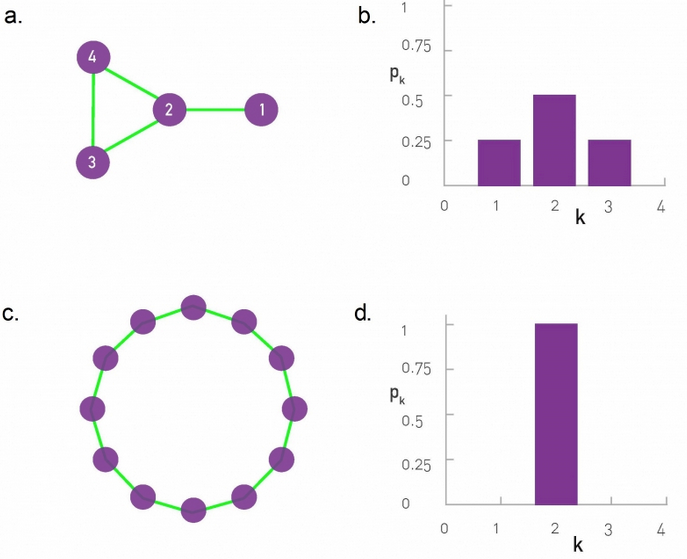

In [3]:
def average_degree(G):
    return sum(G.degree(n) for n in G.nodes) / len(G.nodes)
def average_in(G):
    return sum(G.in_degree(n) for n in G.nodes) / len(G.nodes)
def average_out(G):
    return sum(G.out_degree(n) for n in G.nodes) / len(G.nodes)

In [4]:
print(average_degree(G_pgrid))
print(average_degree(G_arvix))
print(average_degree(G_fb))
print(average_degree(G_wiki))
print(average_degree(G_cora))

2.66909532483303
5.530713468141931
43.69101262688784
28.32382290934645
4.0796780684104625


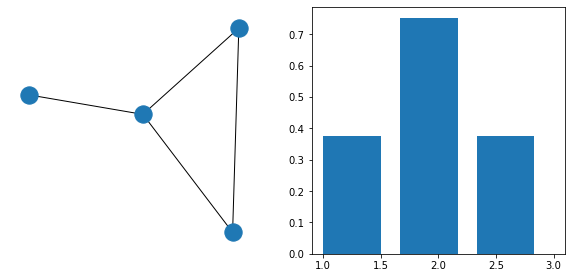

In [5]:
G = nx.cycle_graph(12)
G = nx.Graph([(1,2), (2, 4), (2, 3), (3, 4)])

plt.figure(figsize = (10, 10))
# Plot graph
plt.subplot(2, 2, 1)
nx.draw(G)

# Plot hist
plt.subplot(2, 2, 2)
plt.hist([G.degree(n) for n in G.nodes], density=True, bins = 3, width = .5)
plt.show()

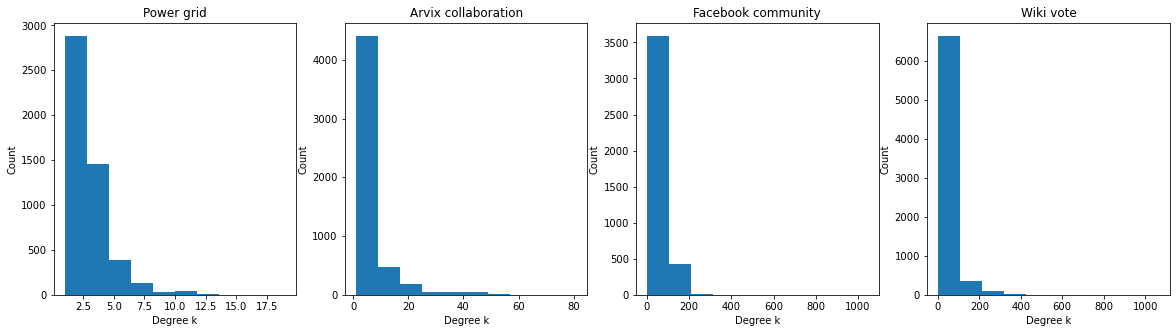

In [6]:
plt.figure(figsize = (4 * 5, 5))
real_graphs = [G_pgrid, G_arvix, G_fb, G_wiki]
titles = ['Power grid', 'Arvix collaboration', 'Facebook community', 'Wiki vote']


for i, (G, title) in enumerate(zip(real_graphs, titles)):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.hist([G.degree(u)  for u in G.nodes])
    plt.xlabel("Degree k")
    plt.ylabel("Count")
plt.show()


Maximum umber of edges $$E_{max} = \dfrac {N(N-1)} 2$$


True


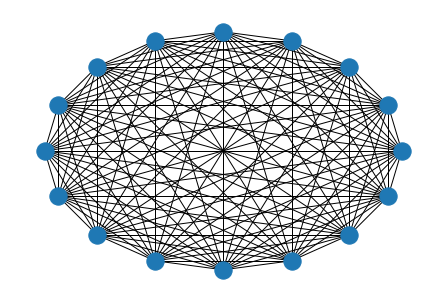

In [7]:
G = nx.complete_graph(16)
nx.draw_circular(G)

print(len(G.edges) == len(G.nodes) * (len(G.nodes) - 1) / 2)

# 3. Connectedness

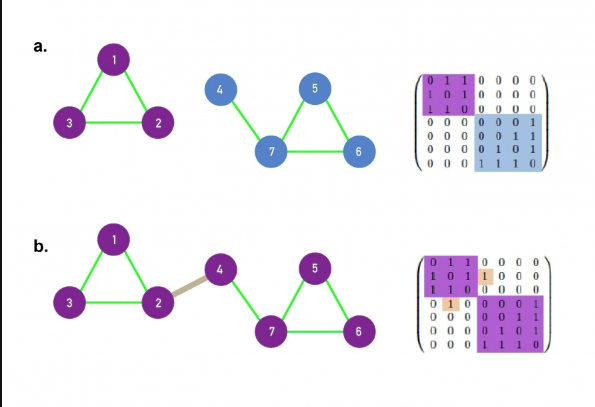

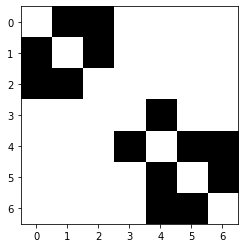

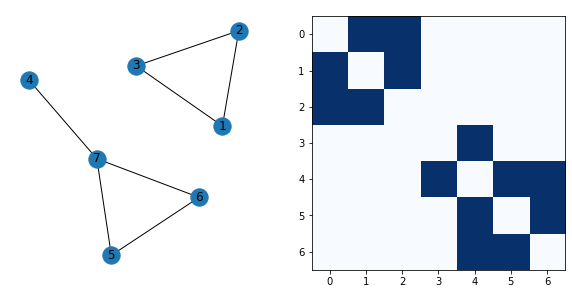

In [26]:
G = nx.Graph([(1, 2), (2, 3), (3, 1), (4, 7), (5, 7), (5, 6), (6, 7)])
A = nx.adjacency_matrix(G).todense()
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
nx.draw_kamada_kawai(G, with_labels = True)
plt.subplot(1, 2, 2)
plt.imshow(A, cmap = 'Blues')
plt.show()

In [229]:
print(nx.is_connected(G))
print(list(nx.connected_components(G)))

Gs0 = G.subgraph(list(nx.connected_components(G))[0])
Gs1 = G.subgraph(list(nx.connected_components(G))[1])

print(Gs0.nodes, Gs1.nodes)

False
[{1, 2, 3}, {4, 5, 6, 7}]
[1, 2, 3] [4, 7, 5, 6]


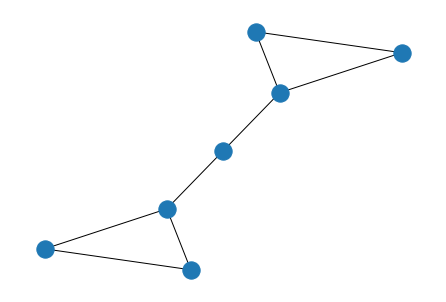

In [230]:
G.add_edge(4, 2)
nx.draw_kamada_kawai(G)

In [231]:
list(nx.bridges(G))

[(2, 4), (4, 7)]

# 4. Clustering coeffs

**What fraction of your neighbours are connected?**
$$C_i = \dfrac {\text{Number of connections between neighbors of } i} {\text{Max num of possible connections between neighbours of } i} = \dfrac {2E_i} {k_i(k_i-1)}$$
$C \in [0, 1]$

*Intuition*
- Out of all the posible edges that connect the neighbours of $i$, how many exist?
- $C_i = 0 \to$ none of the neighbours of $i$ link to each other
- $C_i = 1 \to$ all of the neighbours of $i$ link to each other => complete graph
- $C_i = p \to$ neighbours of $i$ link to each other with a probability of $p$

In [261]:
G1.neighbors(0)

In [264]:
G1.has_edge(0, 1)

True

In [19]:
def clustering_coef(G, u):
    ei = 0
    for i in G.neighbors(u):
        for j in G.neighbors(u):
            if i != j:
                ei +=  G.has_edge(i, j)
    return ei / (G.degree(u) * (G.degree(u) - 1)) # divide by 2 because we count the edges twice
            

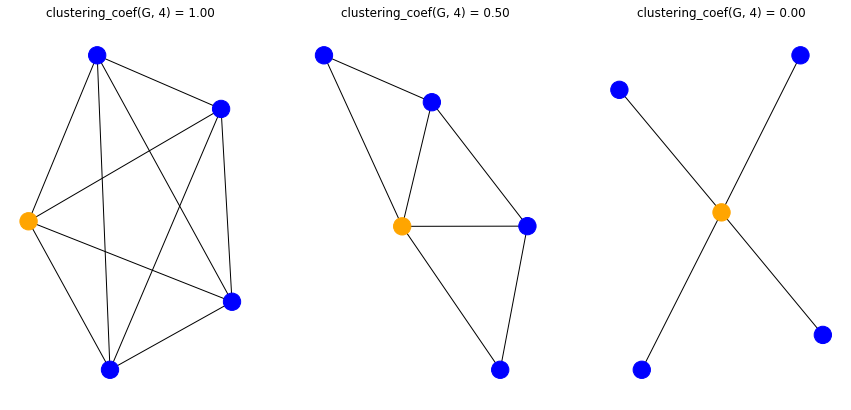

In [31]:
plt.figure(figsize = (15, 7))

G1 = nx.complete_graph(5)
G2 = nx.Graph([(0, 1), (0, 4), (1, 2), (1, 4), (2, 3), (2 ,4), (3, 4)])
G3 = nx.Graph([(0, 4), (1, 4), (2 ,4), (3, 4)])
graphs = [G1, G2, G3]

for i, G in enumerate(graphs):
    plt.subplot(1, 3, i+1)
    plt.title(f"{clustering_coef(G, 4) = :.2f}")
    node_color = ['blue' if u != 4 else 'orange' for u in G.nodes]
    nx.draw(G, node_color=node_color)
    


In [280]:
clustering_coef(G1, 4), clustering_coef(G2, 4), clustering_coef(G3, 4)

(1.0, 0.5, 0.0)

In [281]:
nx.clustering(G1)[4], nx.clustering(G2)[4], nx.clustering(G3)[4]

(1.0, 0.5, 0)

# 5. Centralities

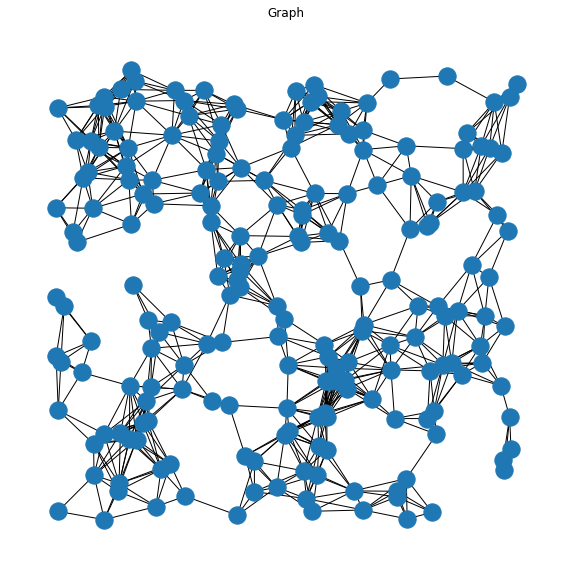

In [334]:
G = nx.random_geometric_graph(200, 0.125, seed=896803)
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize = (10, 10))
plt.title("Graph")
nx.draw(G, pos = pos)

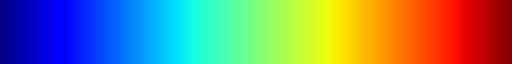

In [317]:
plt.cm.jet

In [323]:
deg_colors = list(G.degree(n) for n in G.nodes)

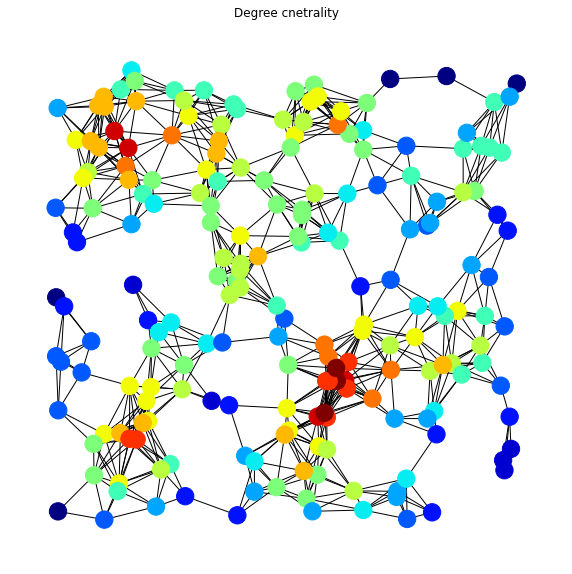

In [332]:
deg_colors = list(G.degree(n) for n in G.nodes)

plt.figure(figsize = (10, 10))
plt.title("Degree cnetrality")
nx.draw(G, pos = pos, node_color = deg_colors, cmap = plt.cm.jet)


**Node betweenness**  
Bridging capability of a node

$Btw(n_i) = \sum_{i\neq j\neq k \in G} \dfrac {\sigma_{ij}(n_i)} {\sigma_{ij}}$

Where

- $σ_{ij}$ is the total number of shortest paths from node $i$ to node $j$
- $\sigma_{ij}(n_i)$ is the number of those paths that pass through $n_i$

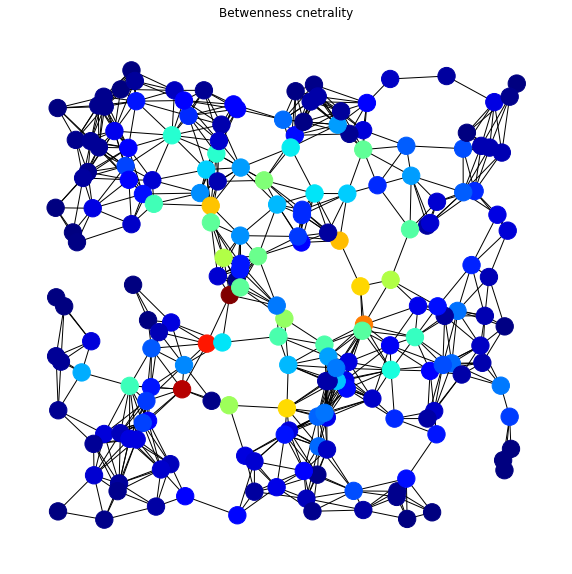

In [330]:
btw_colors = list(nx.betweenness_centrality(G).values())

plt.figure(figsize = (10, 10))
plt.title("Betwenness cnetrality")
nx.draw(G, pos = pos, node_color = btw_colors, cmap = plt.cm.jet)

**Closeness**  
Closer to the center of the network = shortest path to everyone else

$C(x) = \dfrac 1 {\sum_y d(y,x)}$

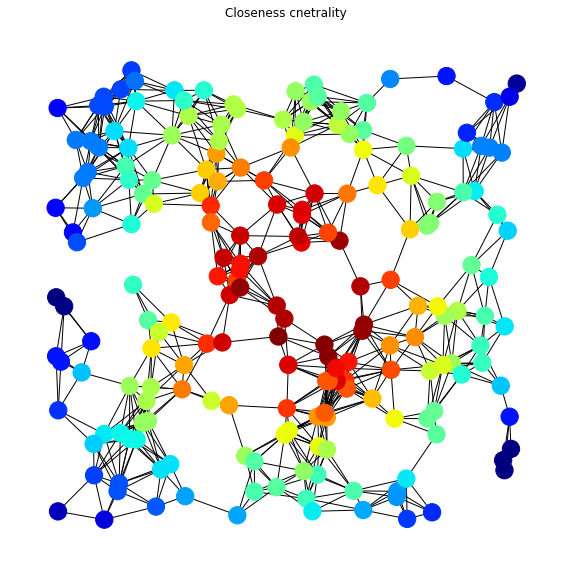

In [329]:
btw_colors = list(nx.closeness_centrality(G).values())

plt.figure(figsize = (10, 10))
plt.title("Closeness cnetrality")
nx.draw(G, pos = pos, node_color = btw_colors, cmap = plt.cm.jet)